In [1]:
import pandas as pd
import sys
sys.path.append('./src/')
import doc_utils
import feature_utils
import imp
imp.reload(feature_utils)  

<module 'feature_utils' from './src/feature_utils.py'>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer, TfidfTransformer

tdidf = TfidfVectorizer(min_df=4,norm='l1')

In [30]:
block_db = pd.read_csv("block_db.csv")
sent_db = pd.read_csv("sent_db.csv")

In [31]:
cl_th_db = sent_db.query("par_type in ['client','therapist']")

In [32]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               2943 non-null   object 
 1   sent_idx_in_block  2943 non-null   float64
 2   block_idx          2943 non-null   float64
 3   is_nar             2943 non-null   float64
 4   doc_idx            2943 non-null   float64
 5   par_db_idx         2943 non-null   float64
 6   par_idx_in_doc     2943 non-null   float64
 7   par_type           2943 non-null   object 
 8   block_type         2943 non-null   object 
 9   nar_idx            2943 non-null   float64
 10  sent_len           2943 non-null   float64
dtypes: float64(8), object(3)
memory usage: 253.0+ KB


## Process with TFidf and run SGDClassifier

Run model for par_type == 'client'
total data len: 1947
len train: 1460, len test: 487
['10', '12', '14', 'l1a', 'l1r', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אומרים', 'אומרת', 'אונס', 'אוקיי', 'איזשהו', 'איזשהי', 'איכשהו', 'אישית', 'איתה']
['יחסים', 'יחסית', 'יכולים', 'יכולתי', 'ילד', 'ילדה', 'יצא', 'יצאתי', 'ישבתי', 'ישירות', 'כאילו', 'כולה', 'כוננויות', 'כזאת', 'כיף', 'כלל', 'כשאני', 'לאו', 'לאיזה', 'לבוא']
['10', 'אמרת', 'בנינו', 'החופש', 'וזהו', 'ישירות', 'לעתים', 'ממני', 'סיימתי', 'שאלתי', 'תראה']


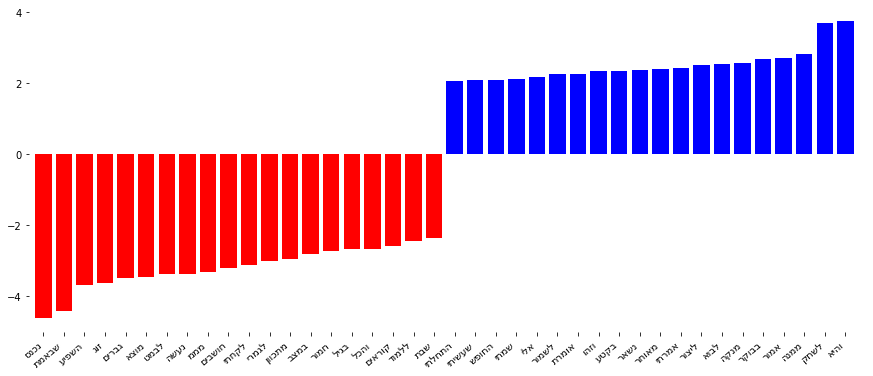

              precision    recall  f1-score   support

         0.0       0.50      0.15      0.23       165
         1.0       0.68      0.93      0.78       322

    accuracy                           0.66       487
   macro avg       0.59      0.54      0.50       487
weighted avg       0.62      0.66      0.59       487

Run model for par_type in ['client','therapist']
total data len: 2839
len train: 2129, len test: 710
['10', '12', '14', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אוי', 'אומרים', 'אומרת', 'אונס', 'אוקי', 'אוקיי', 'אחוז', 'אחותי', 'אחי', 'איזשהו', 'איזשהי']
['כזאת', 'ככ', 'כלומר', 'כלל', 'כללי', 'כמטפל', 'כשאני', 'כשאתה', 'כשהוא', 'לאו', 'לאחרונה', 'לאט', 'לאיזה', 'לאמא', 'לאנשים', 'לבדוק', 'לבוא', 'לבמט', 'לבנק', 'לבקל']
['10', 'באיזה', 'בתל', 'הקטע', 'חודשיים', 'לאיזה', 'לרצות', 'מסוים', 'עבר', 'שאף']


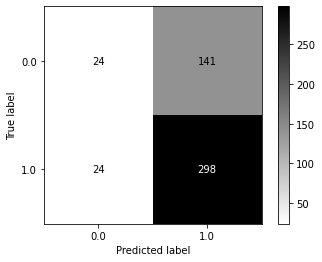

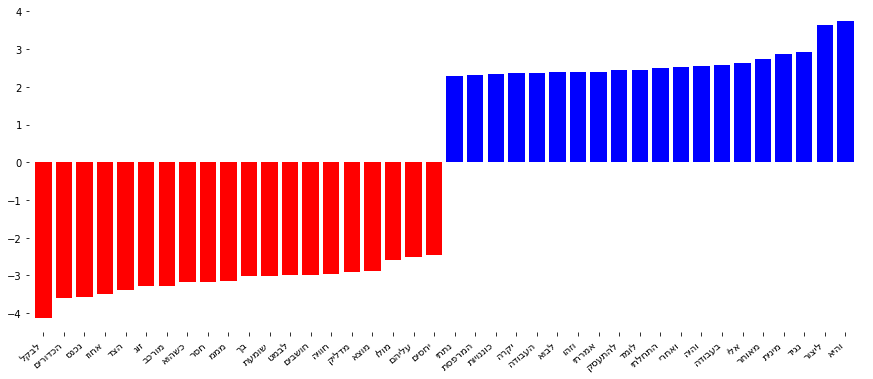

              precision    recall  f1-score   support

         0.0       0.55      0.25      0.34       285
         1.0       0.63      0.86      0.73       425

    accuracy                           0.62       710
   macro avg       0.59      0.55      0.53       710
weighted avg       0.60      0.62      0.57       710



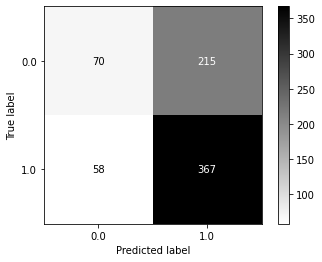

In [36]:
queries = ["par_type == 'client'",
            "par_type in ['client','therapist']"]
for q in queries:
    print("Run model for {}".format(q))
    feature_utils.run_model(sent_db.query(q))

## Embedded - fasttext fro Hebrew

In [37]:
import fasttext.util
ft = fasttext.load_model('./external_src/cc.he.300.bin')

In [39]:
sent_db

,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len
0,CLIENT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,no_mark,not_nar,0.000000,8.000000
1,THERAPIST,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,no_mark,not_nar,0.000000,10.000000
2,התחל,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,no_mark,not_nar,0.000000,5.000000
3,שפהעב,0.000000,3.000000,0.000000,0.000000,3.000000,3.000000,no_mark,not_nar,0.000000,6.000000
4,משתתפים,0.000000,4.000000,0.000000,0.000000,4.000000,4.000000,no_mark,not_nar,0.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...
2938,ככה כמה דקות אה לא לא לא בסדר,0.000000,1355.000000,0.000000,5.000000,1294.000000,269.000000,therapist,not_nar,0.000000,30.000000
2939,לא לא לא בסדר יש לך את הדקות בשביל ה,0.000000,1356.000000,0.000000,5.000000,1295.000000,270.000000,client,not_nar,0.000000,37.000000
2940,יש לך את הדקות בשביל ה,0.000000,1357.000000,0.000000,5.000000,1296.000000,271.000000,therapist,not_nar,0.000000,23.000000
2941,את הזה השאלון,0.000000,1358.000000,0.000000,5.000000,1297.000000,272.000000,client,not_nar,0.000000,15.000000
